In [1]:
import os
import h5py 
import numpy as np 
from tqdm.auto import trange

In [2]:
import corner as DFM

# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
dat_dir = '/Users/chahah/data/goleta/'

In [4]:
ftng = h5py.File(os.path.join(dat_dir, 'tng.snap33.subfind.galaxies.LHC.hdf5'), 'r')
# Om, s8, Asn1, Aagn1, Asn2, Aagn2, Mg, Mstar, Mbh, Mtot, Vmax, Vdisp, Zg, Zs, SFR, J, Vel, Rstar, Rtot, Rvmax,
# absmag U, B, V, K, g, r, i, z
tng = ftng['props'][...]

# restrict only to centrals
is_central = np.loadtxt(os.path.join(dat_dir, 'tng.snap33.subfind.galaxies.LHC.iscen'))
is_central = is_central.astype(bool)

tng = tng[:,is_central]

In [5]:
fsim = h5py.File(os.path.join(dat_dir, 'simba.snap33.subfind.galaxies.LHC.hdf5'), 'r')
# Om, s8, Asn1, Aagn1, Asn2, Aagn2, Mg, Mstar, Mbh, Mtot, Vmax, Vdisp, Zg, Zs, SFR, J, Vel, Rstar, Rtot, Rvmax,
# absmag U, B, V, K, g, r, i, z
sim = fsim['props'][...]

# restrict only to centrals
is_central = np.loadtxt(os.path.join(dat_dir, 'simba.snap33.subfind.galaxies.LHC.iscen'))
is_central = is_central.astype(bool)

sim = sim[:,is_central]

In [21]:
tng_Mstar= tng[7]
tng_Mtot = tng[9]
tng_Vmax = tng[10]
tng_Mgas = tng[6]
tng_Zstar= tng[13]
tng_Zgas = tng[12]
tng_sfr  = tng[14]

sim_Mstar= sim[7]
sim_Mtot = sim[9]
sim_Vmax = sim[10]
sim_Mgas = sim[6]
sim_Zstar= sim[13]
sim_Zgas = sim[12]
sim_sfr  = sim[14]

(9.0, 13.0)

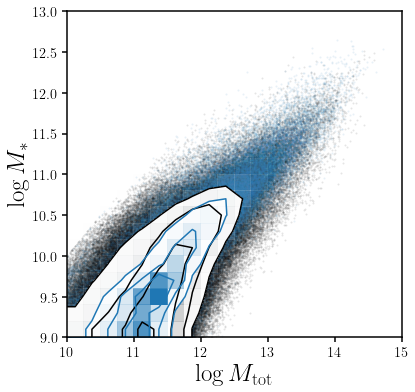

In [7]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
#sub.scatter(np.log10(Mtot), np.log10(Mstar), s=1)
DFM.hist2d(np.log10(tng_Mtot), np.log10(tng_Mstar), range=[(10., 15.), (9., 13.)], 
           color='k', ax=sub)
DFM.hist2d(np.log10(sim_Mtot), np.log10(sim_Mstar), range=[(10., 15.), (9., 13.)], 
           color='C0', ax=sub)
sub.set_xlabel(r'$\log M_{\rm tot}$', fontsize=25)
sub.set_xlim(10., 15.)
sub.set_ylabel(r'$\log M_*$', fontsize=25)
sub.set_ylim(9, 13)

(1.2, 3.2)

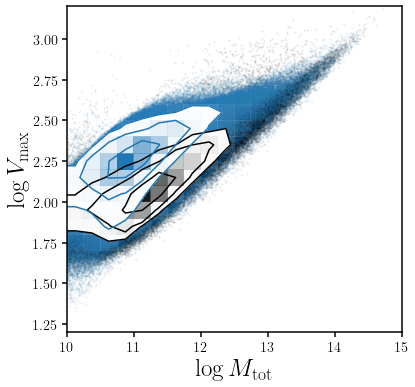

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
DFM.hist2d(np.log10(tng_Mtot), np.log10(tng_Vmax), range=[(10., 15.), (1.2, 3.2)], 
           color='k', ax=sub)
DFM.hist2d(np.log10(sim_Mtot), np.log10(sim_Vmax), range=[(10., 15.), (1.2, 3.2)], 
           color='C0', ax=sub)
sub.set_xlabel(r'$\log M_{\rm tot}$', fontsize=25)
sub.set_xlim(10., 15.)
sub.set_ylabel(r'$\log V_{\rm max}$', fontsize=25)
sub.set_ylim(1.2, 3.2)

In [9]:
tng_epsilon_star = (tng[0]/0.049) * (tng[7]/tng[9])
sim_epsilon_star = (sim[0]/0.049) * (sim[7]/sim[9])

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


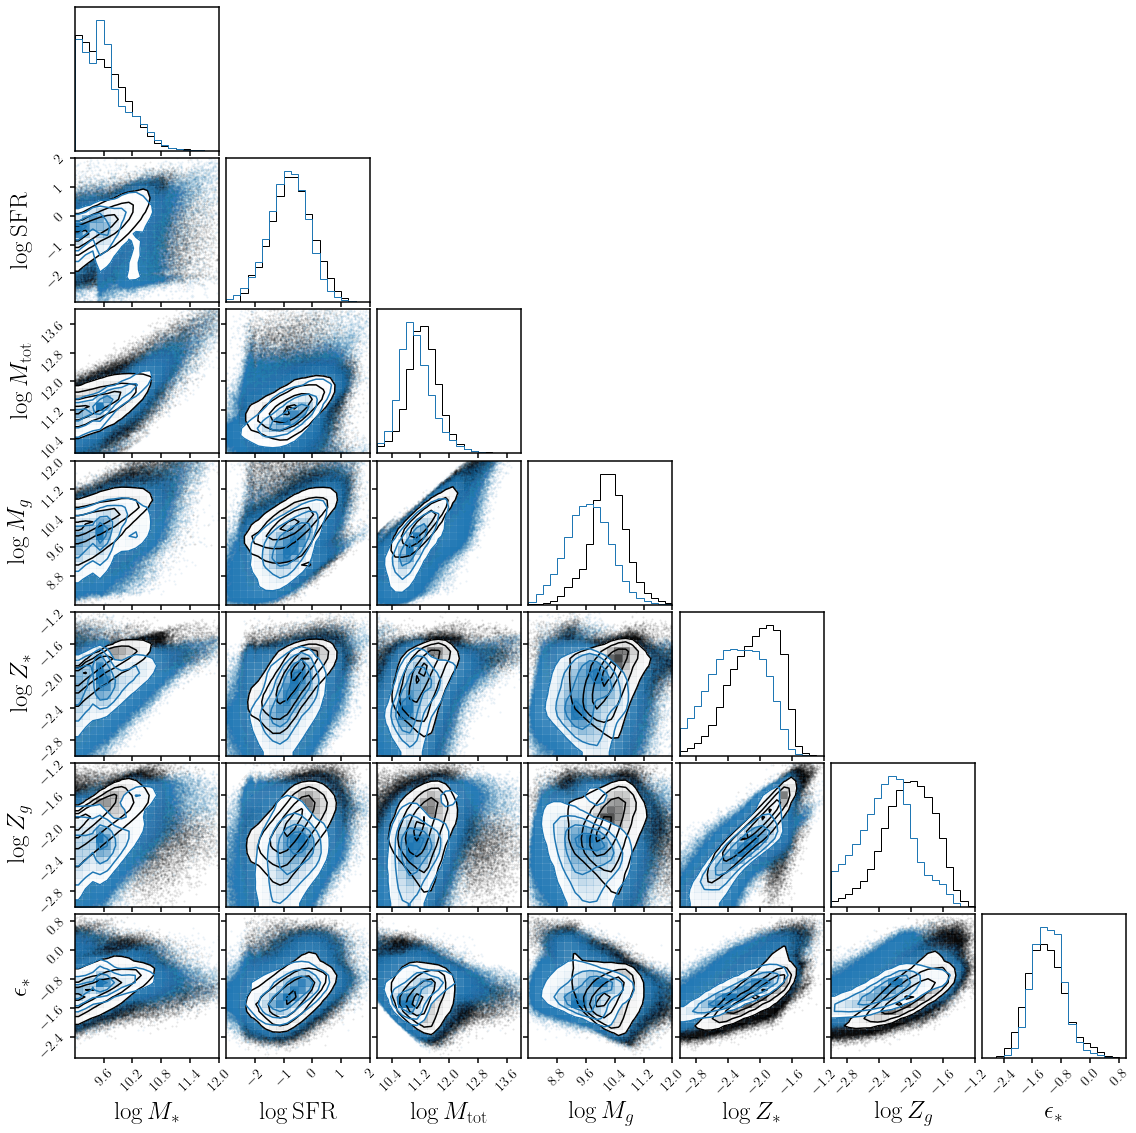

In [26]:
_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_Zgas), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1)], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar), np.log10(sim_Zgas), np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1)], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\log Z_g$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)

# intermediate star-forming galaxies

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


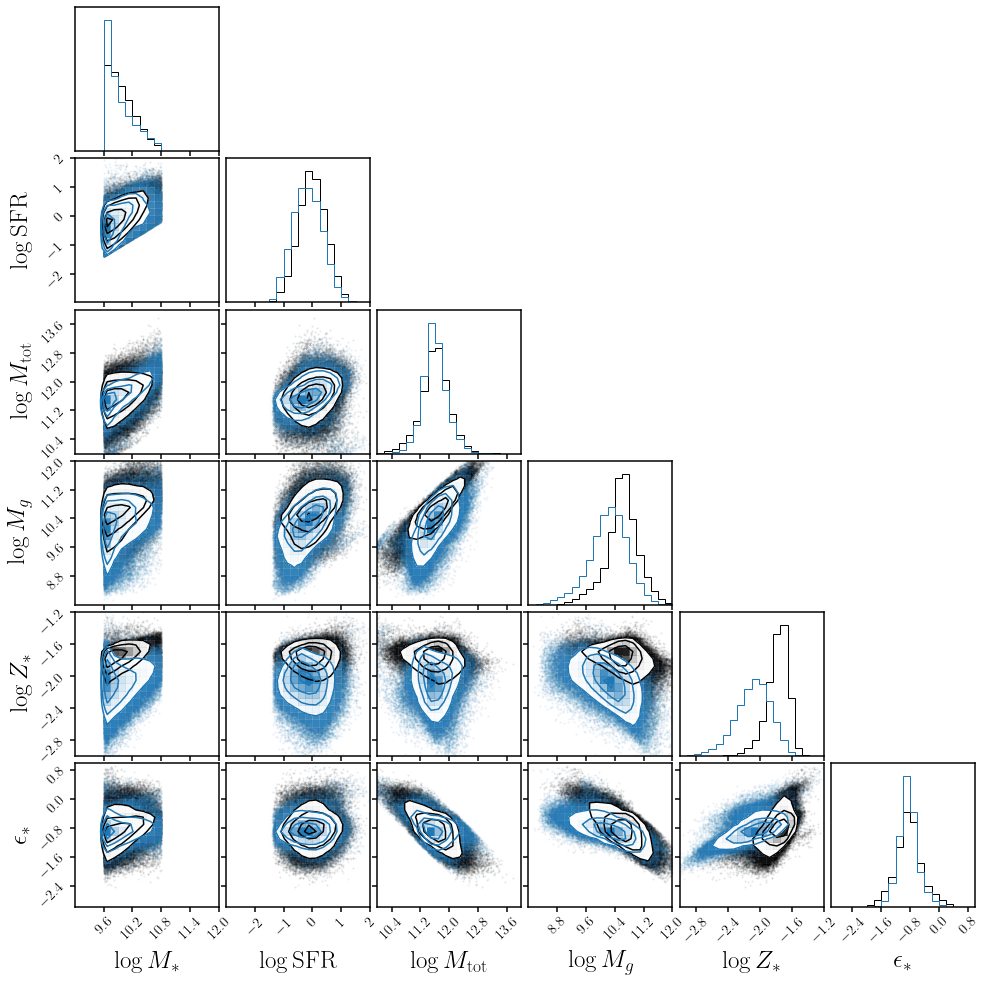

In [15]:
select = ((np.log10(tng_Mstar) > 9.6) & (np.log10(tng_Mstar) < 10.8) & 
          (np.log10(tng_sfr) - np.log10(tng_Mstar) > -11))
_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

select = ((np.log10(sim_Mstar) > 9.6) & (np.log10(sim_Mstar) < 10.8) & 
          (np.log10(sim_sfr) - np.log10(sim_Mstar) > -11))
_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar), np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)

# intermediate quiescent

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


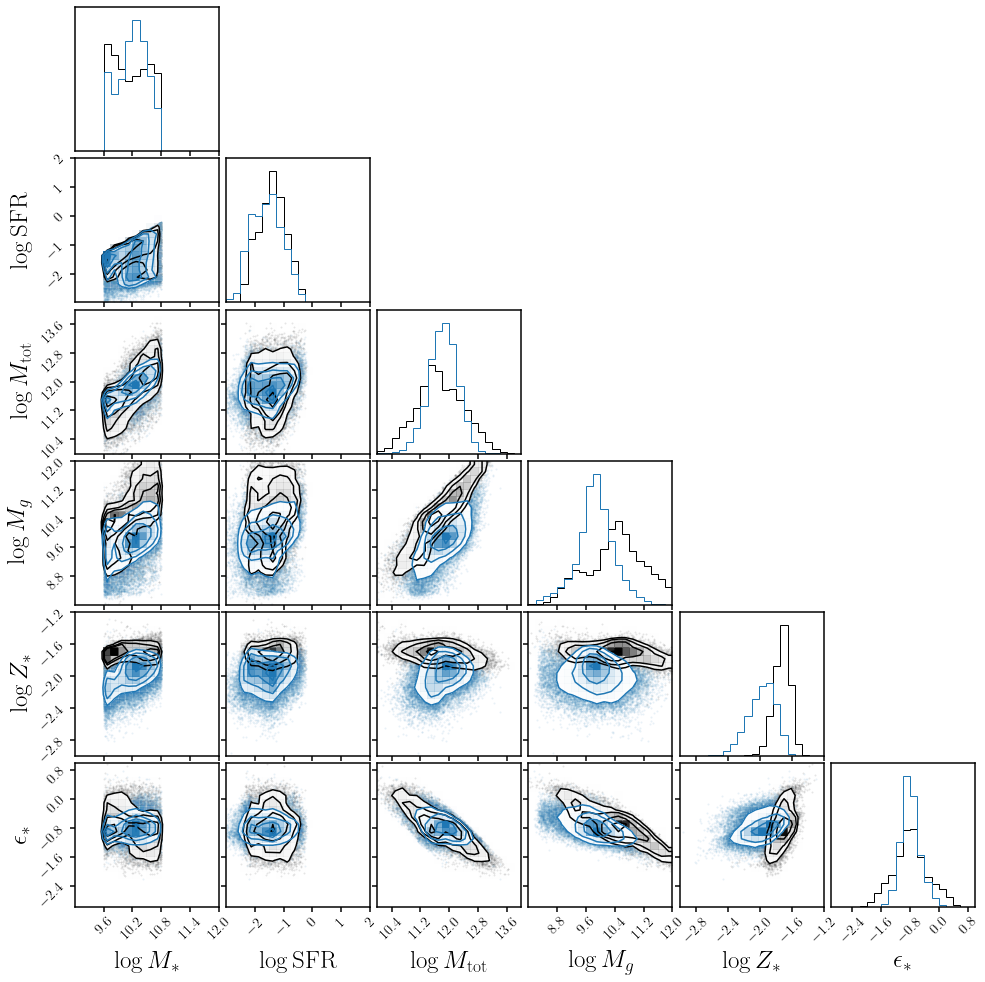

In [13]:
select = ((np.log10(tng_Mstar) > 9.6) & (np.log10(tng_Mstar) < 10.8) & 
          (np.log10(tng_sfr) - np.log10(tng_Mstar) < -11))
#((np.log10(tng_Mtot) > 11.) &  (np.log10(tng_Mgas) > 9.6) & (np.log10(tng_Mgas) < 10.4))

_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

select = ((np.log10(sim_Mstar) > 9.6) & (np.log10(sim_Mstar) < 10.8) & 
          (np.log10(sim_sfr) - np.log10(sim_Mstar) < -11))
#((np.log10(sim_Mtot) > 11.) & (np.log10(sim_Mgas) > 9.6) & (np.log10(sim_Mgas) < 10.4))
_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar), np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)

# low mass star-forming

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


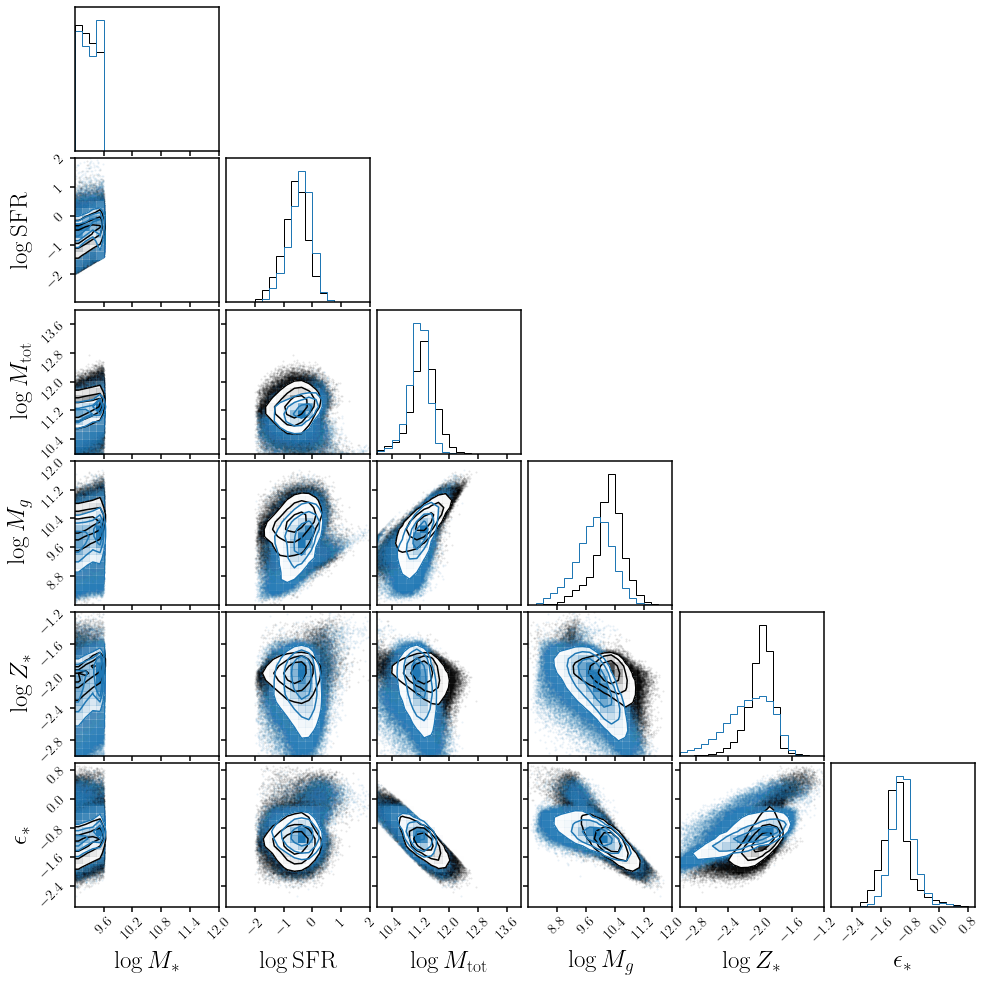

In [16]:
select = (np.log10(tng_Mstar) > 9.) & (np.log10(tng_Mstar) < 9.6) & (np.log10(tng_sfr) - np.log10(tng_Mstar) > -11) 
#((np.log10(tng_Mtot) > 11.) &  (np.log10(tng_Mgas) > 9.6) & (np.log10(tng_Mgas) < 10.4))

_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

select = (np.log10(sim_Mstar) > 9.) & (np.log10(sim_Mstar) < 9.6) & (np.log10(sim_sfr) - np.log10(sim_Mstar) > -11)  
#((np.log10(sim_Mtot) > 11.) & (np.log10(sim_Mgas) > 9.6) & (np.log10(sim_Mgas) < 10.4))
_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar), np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


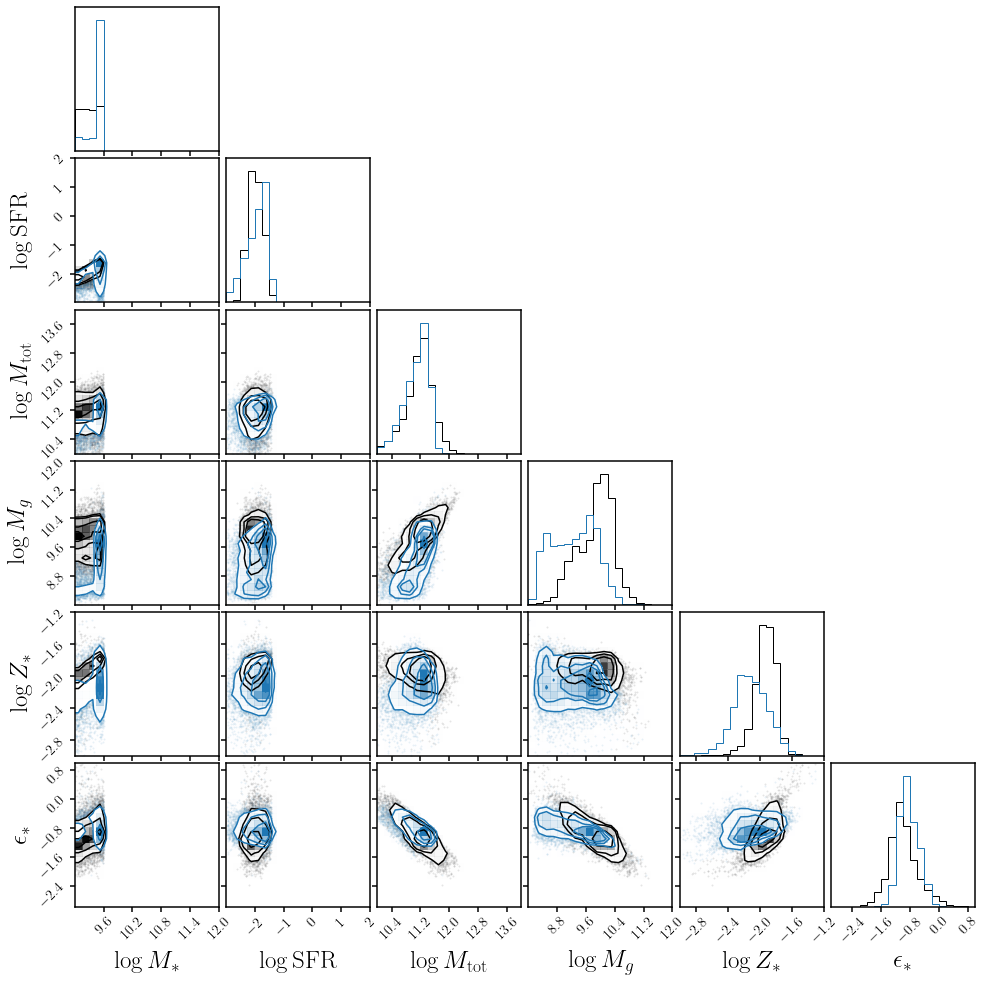

In [17]:
select = (np.log10(tng_Mstar) > 9.) & (np.log10(tng_Mstar) < 9.6) & (np.log10(tng_sfr) - np.log10(tng_Mstar) < -11) 
#((np.log10(tng_Mtot) > 11.) &  (np.log10(tng_Mgas) > 9.6) & (np.log10(tng_Mgas) < 10.4))

_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

select = (np.log10(sim_Mstar) > 9.) & (np.log10(sim_Mstar) < 9.6) & (np.log10(sim_sfr) - np.log10(sim_Mstar) < -11)  
#((np.log10(sim_Mtot) > 11.) & (np.log10(sim_Mgas) > 9.6) & (np.log10(sim_Mgas) < 10.4))
_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar), np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)

# intermediate star-forming galaxy "with weak emission lines"

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.

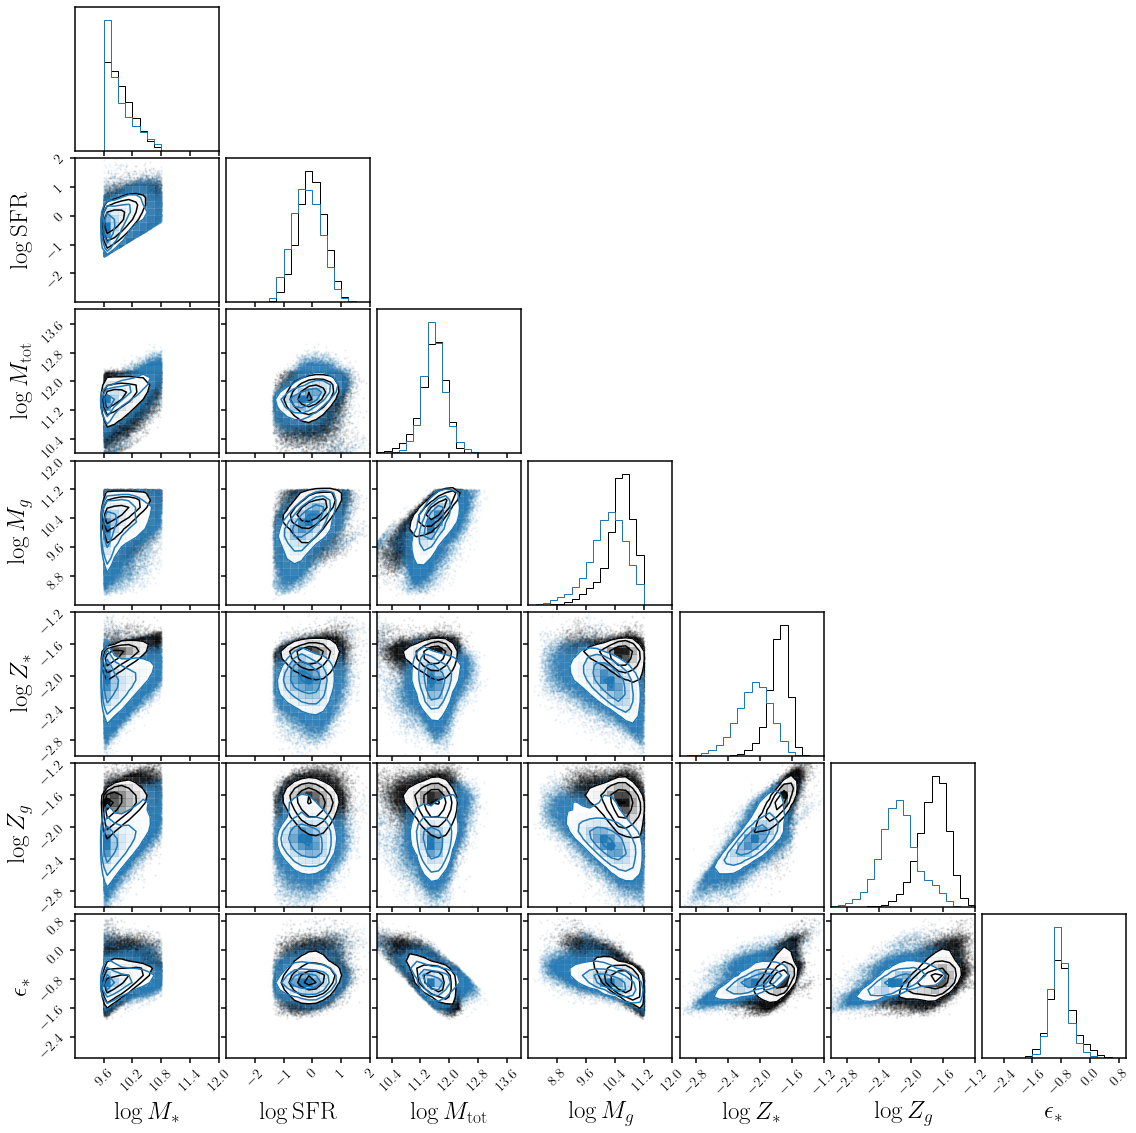

In [30]:
select = ((np.log10(tng_Mstar) > 9.6) & (np.log10(tng_Mstar) < 10.8) & 
          (np.log10(tng_sfr) - np.log10(tng_Mstar) > -11) & (np.log10(tng_Mgas) < 11.2))
_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_Zgas), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

select = ((np.log10(sim_Mstar) > 9.6) & (np.log10(sim_Mstar) < 10.8) & 
          (np.log10(sim_sfr) - np.log10(sim_Mstar) > -11) & 
          (np.log10(sim_Mgas) < 11.2))
_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar), np.log10(sim_Zgas), np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\log Z_g$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)

/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/opt/anaconda3/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.

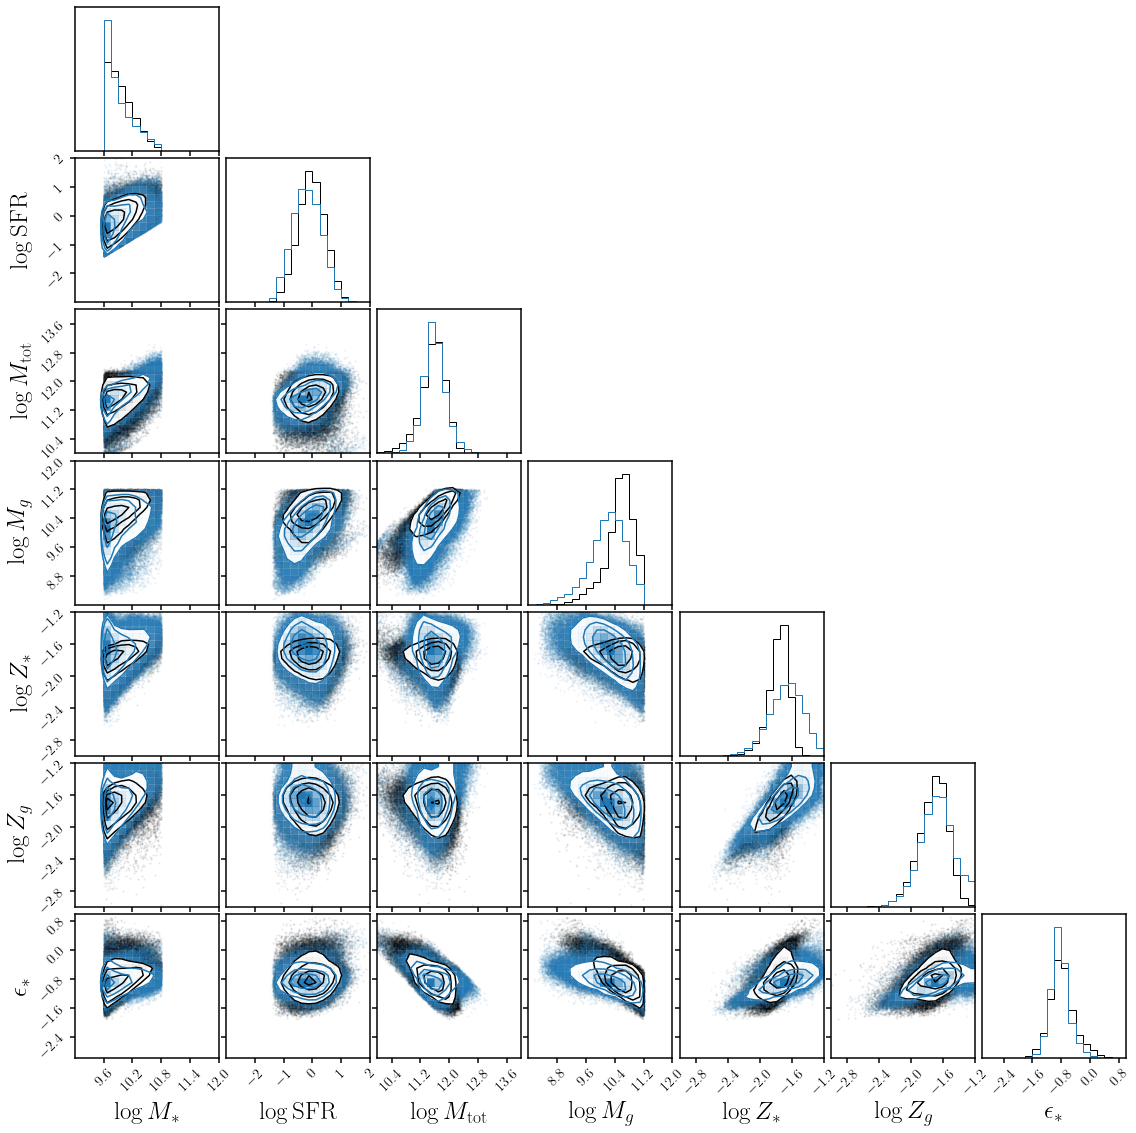

In [31]:
select = ((np.log10(tng_Mstar) > 9.6) & (np.log10(tng_Mstar) < 10.8) & 
          (np.log10(tng_sfr) - np.log10(tng_Mstar) > -11) & (np.log10(tng_Mgas) < 11.2))
_data = np.array([np.log10(tng_Mstar), np.log10(tng_sfr), np.log10(tng_Mtot), np.log10(tng_Mgas), 
                  np.log10(tng_Zstar), np.log10(tng_Zgas), np.log10(tng_epsilon_star)]).T

fig = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='k',
                 range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., -1.2), (-3., 1)],
                 hist_kwargs={'density': True})

select = ((np.log10(sim_Mstar) > 9.6) & (np.log10(sim_Mstar) < 10.8) & 
          (np.log10(sim_sfr) - np.log10(sim_Mstar) > -11) & 
          (np.log10(sim_Mgas) < 11.2))
_data = np.array([np.log10(sim_Mstar), np.log10(sim_sfr), np.log10(sim_Mtot), np.log10(sim_Mgas), 
                  np.log10(sim_Zstar)+0.4, np.log10(sim_Zgas)+0.5, np.log10(sim_epsilon_star)]).T

_ = DFM.corner(_data[np.all(np.isfinite(_data), axis=1) & select], color='C0', 
               range=[(9., 12.), (-3., 2), (10, 14.), (8., 12.), (-3., -1.2), (-3., -1.2), (-3., 1)],
               hist_kwargs={'density': True}, 
               labels=[r'$\log M_*$', r'$\log {\rm SFR}$', r'$\log M_{\rm tot}$', 
                       r'$\log M_g$', r'$\log Z_*$', r'$\log Z_g$', r'$\epsilon_*$'], 
               label_kwargs={'fontsize': 25}, 
               fig=fig)